In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load MNIST dataset from torchvision datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='/content/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='/content/', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 39.4MB/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.15MB/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 8.95MB/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.12MB/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


NameError: name 'nn' is not defined

In [ ]:
# Initialize model, loss function, and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 10
train_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("Training complete!")


Epoch [1/10], Loss: 0.3913
Epoch [2/10], Loss: 0.1847
Epoch [3/10], Loss: 0.1387
Epoch [4/10], Loss: 0.1122
Epoch [5/10], Loss: 0.0957
Epoch [6/10], Loss: 0.0834
Epoch [7/10], Loss: 0.0723
Epoch [8/10], Loss: 0.0667
Epoch [9/10], Loss: 0.0612
Epoch [10/10], Loss: 0.0565
Training complete!


In [ ]:
# Testing loop
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 97.13%


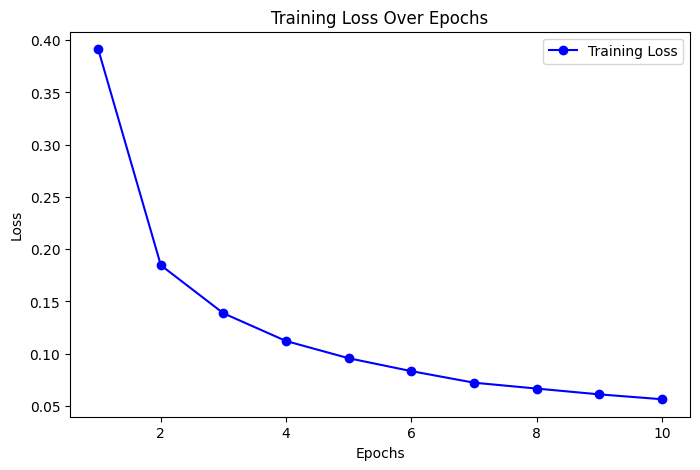

In [ ]:
# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), train_losses, marker='o', linestyle='-', color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


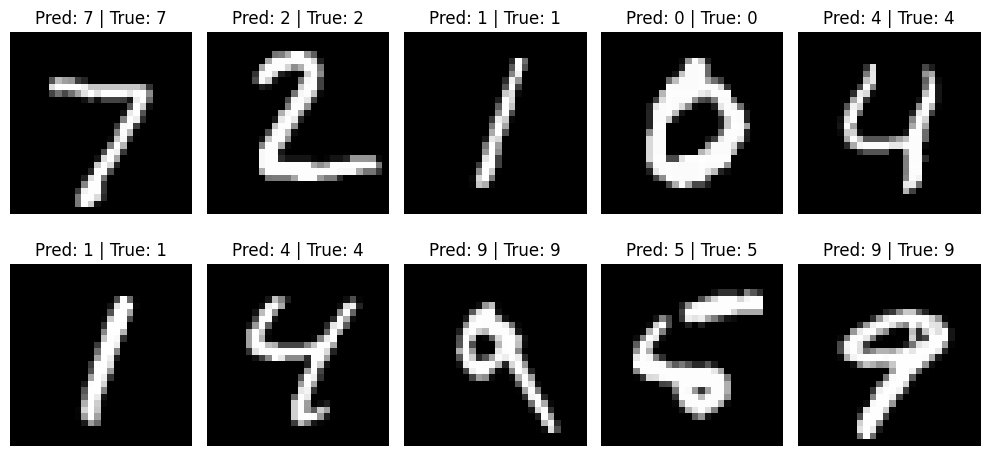

In [ ]:
# Plot some test images with predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(10):
    img, label = test_dataset[i]
    img = img.squeeze().numpy()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pred: {all_preds[i]} | True: {all_labels[i]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Mission 1 : Learning rate

1.   Find the learning rate and multiply it by 10 (and divise it by 10). Then compare the convergence figures of training loss.
2.   Conclude your findings.




### Example

```python
# Initialize model, loss function, and optimizer
model_1 = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
# Training loop
num_epochs = 2
train_losses_1 = []
for epoch in range(num_epochs):
    running_loss_1 = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss_1 = criterion(outputs, labels)
        loss_1.backward()
        optimizer.step()

        running_loss_1 += loss_1.item()

    epoch_loss_1 = running_loss_1 / len(train_loader)
    train_losses_1.append(epoch_loss_1)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss_1:.4f}")

print("Training complete!")
```

In [ ]:
def train(model, lr=0.001, num_epochs=10):
    # Initialization
    print(f"Training model with lr: {lr}")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses = []

    # Training
    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate statistics
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print("Training complete!\n")
    return train_losses

train_losses_1 = train(MLP().to(device), lr=0.0001)
train_losses_2 = train(MLP().to(device), lr=0.001)
train_losses_3 = train(MLP().to(device), lr=0.01)

Training model with lr: 0.0001
Epoch [1/10], Loss: 0.7782
Epoch [2/10], Loss: 0.3463
Epoch [3/10], Loss: 0.2934
Epoch [4/10], Loss: 0.2596
Epoch [5/10], Loss: 0.2319
Epoch [6/10], Loss: 0.2088
Epoch [7/10], Loss: 0.1899
Epoch [8/10], Loss: 0.1736
Epoch [9/10], Loss: 0.1585
Epoch [10/10], Loss: 0.1460
Training complete!

Training model with lr: 0.001
Epoch [1/10], Loss: 0.3980
Epoch [2/10], Loss: 0.1903
Epoch [3/10], Loss: 0.1375
Epoch [4/10], Loss: 0.1106
Epoch [5/10], Loss: 0.0934
Epoch [6/10], Loss: 0.0822
Epoch [7/10], Loss: 0.0720
Epoch [8/10], Loss: 0.0641
Epoch [9/10], Loss: 0.0620
Epoch [10/10], Loss: 0.0519
Training complete!

Training model with lr: 0.01
Epoch [1/10], Loss: 0.3734
Epoch [2/10], Loss: 0.2515
Epoch [3/10], Loss: 0.2368
Epoch [4/10], Loss: 0.2214
Epoch [5/10], Loss: 0.2078
Epoch [6/10], Loss: 0.2102
Epoch [7/10], Loss: 0.1913
Epoch [8/10], Loss: 0.1898
Epoch [9/10], Loss: 0.1889
Epoch [10/10], Loss: 0.1902
Training complete!



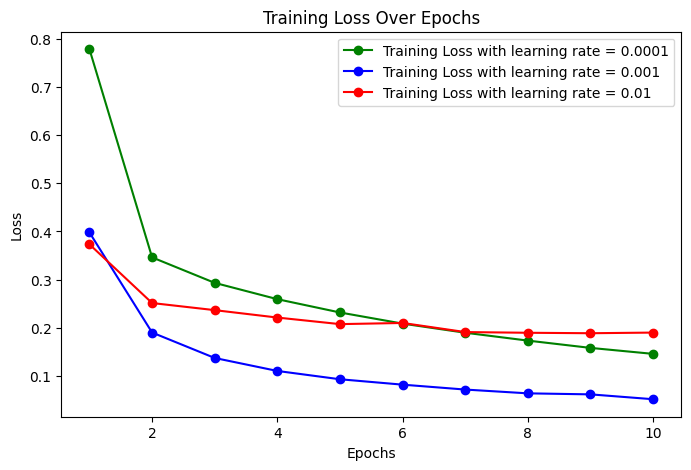

In [ ]:
plt.figure(figsize=(8, 5))

num_epochs = 10
plt.plot(range(1, num_epochs+1), train_losses_1, marker='o', linestyle='-', color='g', label='Training Loss with learning rate = 0.0001')
plt.plot(range(1, num_epochs+1), train_losses_2, marker='o', linestyle='-', color='b', label='Training Loss with learning rate = 0.001')
plt.plot(range(1, num_epochs+1), train_losses_3, marker='o', linestyle='-', color='r', label='Training Loss with learning rate = 0.01')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

plt.legend()
plt.show()

# Mission 2 : MLP Model adaption

1.   Change the structure of your neural networks, adapt to a 1 hidden layer one and a 3 hidden layer one.
2.   The 2 hidden layer NNs is $28*28 \to 128 \to 10$; The 3 hidden layer is $28*28 \to 128 \to 64 \to 32 \to 10$.
3.   Compare the convergence figures and conclude.




In [ ]:
# 1 hidden layer
class MLP_1(nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2 hidden layer
class MLP_2(nn.Module):
    def __init__(self):
        super(MLP_2, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3 hidden layer
class MLP_3(nn.Module):
    def __init__(self):
        super(MLP_3, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
train_losses_MLP_1 = train(MLP_1().to(device))
train_losses_MLP_2 = train(MLP_2().to(device))
train_losses_MLP_3 = train(MLP_3().to(device))

Training model with lr: 0.001
Epoch [1/10], Loss: 0.3868
Epoch [2/10], Loss: 0.2039
Epoch [3/10], Loss: 0.1442
Epoch [4/10], Loss: 0.1174
Epoch [5/10], Loss: 0.0995
Epoch [6/10], Loss: 0.0864
Epoch [7/10], Loss: 0.0777
Epoch [8/10], Loss: 0.0710
Epoch [9/10], Loss: 0.0632
Epoch [10/10], Loss: 0.0575
Training complete!

Training model with lr: 0.001
Epoch [1/10], Loss: 0.3863
Epoch [2/10], Loss: 0.1796
Epoch [3/10], Loss: 0.1318
Epoch [4/10], Loss: 0.1078
Epoch [5/10], Loss: 0.0913
Epoch [6/10], Loss: 0.0774
Epoch [7/10], Loss: 0.0716
Epoch [8/10], Loss: 0.0620
Epoch [9/10], Loss: 0.0565
Epoch [10/10], Loss: 0.0514
Training complete!

Training model with lr: 0.001
Epoch [1/10], Loss: 0.4581
Epoch [2/10], Loss: 0.2080
Epoch [3/10], Loss: 0.1522
Epoch [4/10], Loss: 0.1241
Epoch [5/10], Loss: 0.1042
Epoch [6/10], Loss: 0.0929
Epoch [7/10], Loss: 0.0847
Epoch [8/10], Loss: 0.0764
Epoch [9/10], Loss: 0.0685
Epoch [10/10], Loss: 0.0621
Training complete!



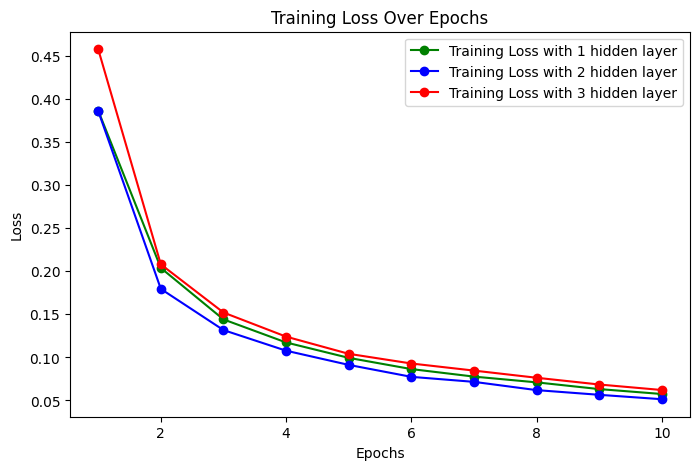

In [ ]:
plt.figure(figsize=(8, 5))

num_epochs = 10
plt.plot(range(1, num_epochs+1), train_losses_MLP_1, marker='o', linestyle='-', color='g', label='Training Loss with 1 hidden layer')
plt.plot(range(1, num_epochs+1), train_losses_MLP_2, marker='o', linestyle='-', color='b', label='Training Loss with 2 hidden layer')
plt.plot(range(1, num_epochs+1), train_losses_MLP_3, marker='o', linestyle='-', color='r', label='Training Loss with 3 hidden layer')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

plt.legend()
plt.show()

# Mission 3 : Concolution NNs (CNNs)


1.   Use the following CNN model for the training and explain the meaning of sef.conv_layers.
2.   Compare the resuts with MLPs and conclude.



In [ ]:
# CNN Model Definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 5 * 5, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

train_losses_MLP = train(MLP().to(device))
train_losses_CNN = train(CNN().to(device))

Training model with lr: 0.001
Epoch [1/10], Loss: 0.3957
Epoch [2/10], Loss: 0.1905
Epoch [3/10], Loss: 0.1382
Epoch [4/10], Loss: 0.1125
Epoch [5/10], Loss: 0.0978
Epoch [6/10], Loss: 0.0840
Epoch [7/10], Loss: 0.0743
Epoch [8/10], Loss: 0.0695
Epoch [9/10], Loss: 0.0605
Epoch [10/10], Loss: 0.0583
Training complete!

Training model with lr: 0.001
Epoch [1/10], Loss: 0.1726
Epoch [2/10], Loss: 0.0485
Epoch [3/10], Loss: 0.0351
Epoch [4/10], Loss: 0.0256
Epoch [5/10], Loss: 0.0200
Epoch [6/10], Loss: 0.0158
Epoch [7/10], Loss: 0.0136
Epoch [8/10], Loss: 0.0112
Epoch [9/10], Loss: 0.0090
Epoch [10/10], Loss: 0.0083
Training complete!



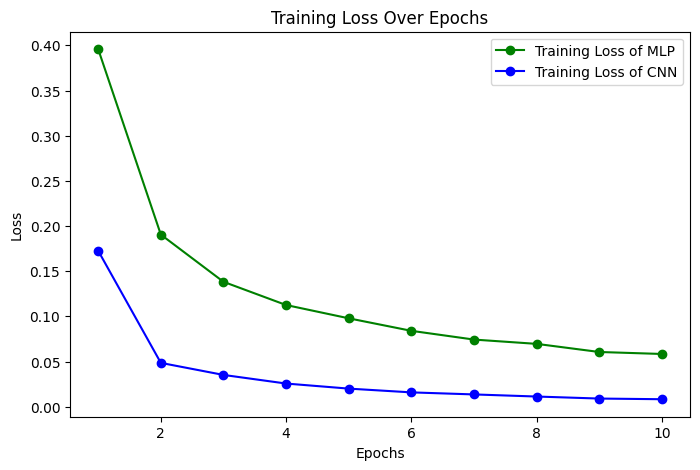

In [ ]:
plt.figure(figsize=(8, 5))

num_epochs = 10
plt.plot(range(1, num_epochs+1), train_losses_MLP, marker='o', linestyle='-', color='g', label='Training Loss of MLP')
plt.plot(range(1, num_epochs+1), train_losses_CNN, marker='o', linestyle='-', color='b', label='Training Loss of CNN')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

plt.legend()
plt.show()

In [ ]:
print(sum(train_losses_MLP) / len(train_losses_MLP))
print(sum(train_losses_CNN) / len(train_losses_CNN))

NameError: name 'train_losses_MLP' is not defined

# Mission 4 : Adapt to CIFAR-10 dataset


1.   We do the same thing for CIFAR-10 dataset, use an adapted CNN (ask ChatGPT) to realize the classification task.
2.   Explain the dimensions of variables in the new CNNs.


In [ ]:
# Load CIFAR-10 dataset
transform_cifar = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_subset, _ = torch.utils.data.random_split(cifar_trainset, [5000, len(cifar_trainset)-5000])
cifar_trainloader = torch.utils.data.DataLoader(cifar_subset, batch_size=32, shuffle=True)

# Get test loader
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)
cifar_testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


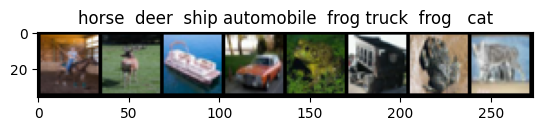

Image shape: torch.Size([3, 32, 32])


In [ ]:
# Visualize and explain CIFAR-10 images
classes = cifar_trainset.classes

def show_images(images, labels):
    images = images / 2 + 0.5  # unnormalize
    npimg = torchvision.utils.make_grid(images).numpy()
    import matplotlib.pyplot as plt
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))
    plt.show()

# Get some random training images
import numpy as np
dataiter = iter(cifar_trainloader)
images, labels = next(dataiter)
show_images(images[:8], labels[:8])

# CIFAR-10 Image dimensions explanation
print(f'Image shape: {images[0].shape}')  # (channels, height, width) = (3, 32, 32)


In [ ]:
# CNN Model Definition for CIFAR dataset
# 32 * 32 pixels
# 3 color channels (RGB)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 6 * 6, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [ ]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses = []

for epoch in range(20):
    running_loss = 0.0

    for images, labels in cifar_trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(cifar_trainloader)
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("Training complete!\n")

Epoch [1/20], Loss: 1.8315
Epoch [2/20], Loss: 1.4994
Epoch [3/20], Loss: 1.3187
Epoch [4/20], Loss: 1.1615
Epoch [5/20], Loss: 1.0067
Epoch [6/20], Loss: 0.8712
Epoch [7/20], Loss: 0.7711
Epoch [8/20], Loss: 0.6368
Epoch [9/20], Loss: 0.5605
Epoch [10/20], Loss: 0.4840
Epoch [11/20], Loss: 0.3924
Epoch [12/20], Loss: 0.3767
Epoch [13/20], Loss: 0.3309
Epoch [14/20], Loss: 0.3050
Epoch [15/20], Loss: 0.2769
Epoch [16/20], Loss: 0.2497
Epoch [17/20], Loss: 0.2230
Epoch [18/20], Loss: 0.2395
Epoch [19/20], Loss: 0.2353
Epoch [20/20], Loss: 0.2326
Training complete!



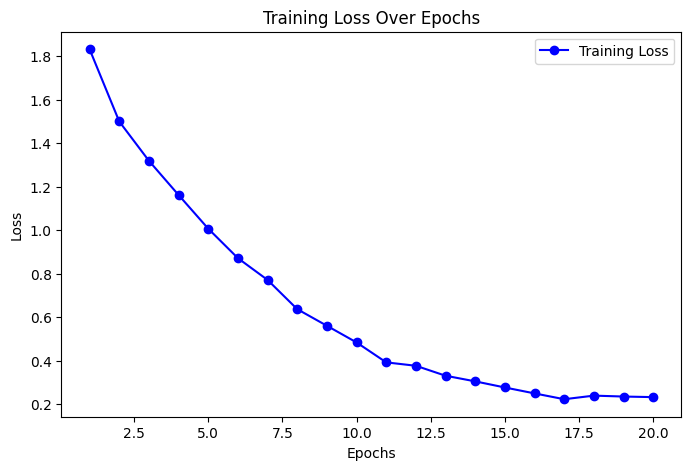

In [ ]:
plt.figure(figsize=(8, 5))

num_epochs = 20
plt.plot(range(1, num_epochs+1), train_losses, marker='o', linestyle='-', color='b', label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

plt.legend()
plt.show()

In [ ]:
model.eval()

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in cifar_testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total

print(f'Accuracy of the model on the test images: {accuracy:.2f}%')
print(f'The model predicted {correct} out of {total} images correct.')

Accuracy of the model on the test images: 58.08%
The model predicted 5808 out of 10000 images correct.


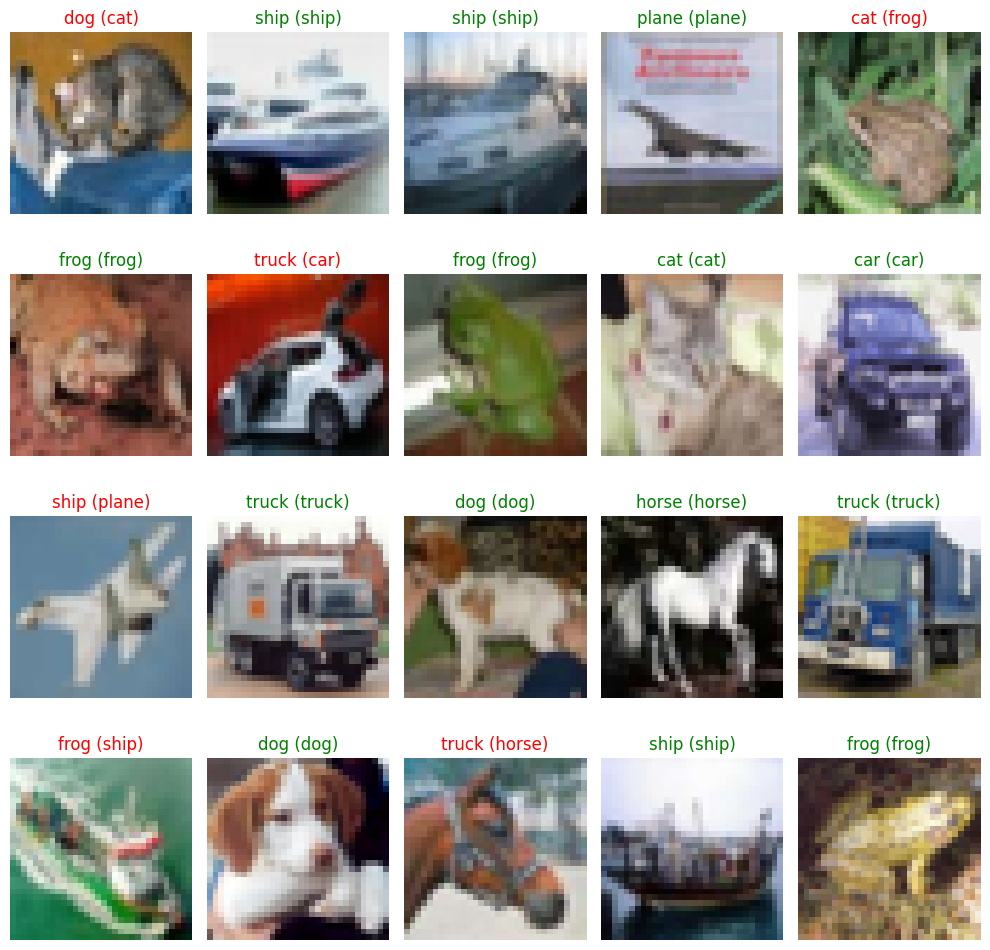

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_test_images(images, labels, preds, num_images=20):
    fig, axes = plt.subplots(4, 5, figsize=(10, 10))
    axes = axes.flatten()

    for i in range(num_images):
        img = images[i].cpu().numpy()
        img = np.transpose(img, (1, 2, 0))

        axes[i].imshow(img / 2 + 0.5)
        axes[i].set_title(f'{classes[preds[i]]} ({classes[labels[i]]})', color=('green' if classes[preds[i]] == classes[labels[i]] else 'red'))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

dataiter = iter(cifar_testloader)
images, labels = next(dataiter)
plot_test_images(images[:20], labels[:20], all_preds[:20])